In [1]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
def get_row(arr, i, j):    # выясняет, сколько черных пикселей находится рядом в 
    count = 0;             # сумме слева и справа от текущего черного пикселя
    for delta in range(i - 1, -1, -1): # идем влево
        if (arr[delta][j] == 0):
            count += 1
        else:
            break
    for delta in range(i + 1, len(arr)): # идем вправо
        if (arr[delta][j] == 0):
            count += 1
        else:
            break
    return count + 1
            
def get_col (arr, i, j):    # выясняет, сколько черных пикселей находится рядом в 
    count = 0;              # сумме сверху и снизу от текущего черного пикселя
    for delta in range(j - 1, -1, -1): # идем вверх
        if (arr[i][delta] == 0):
            count += 1
        else:
            break
    for delta in range(j + 1, len(arr[0])): # идем вниз
        if (arr[i][delta] == 0):
            count += 1
        else:
            break
    return count + 1

In [3]:

def get_width(new_A): # функция находит ширину ребер на данном изображении
    n = len(new_A)
    m = len(new_A[0])
    values = np.arange(n * m);
    size = 0
    for i in range(0, len(new_A)):
        for j in range(0, len(new_A[i])):
            if new_A[i][j] == 0:
                row_count = get_row(new_A, i, j) # считаем 
                col_count = get_col(new_A, i, j)
                values[size] = min(row_count, col_count); # в ответ кладем минимальное значение для данного пикселя из ответа "по строке" и "по столбцу"
                #print(values[size])
                size += 1
    values = values[0:size]
    return statistics.mode(values) # среди значений полученных для каждого пикселя, берем моду


In [4]:

def get_width(new_A): # функция находит ширину ребер на данном изображении
    n = len(new_A)
    m = len(new_A[0])
    values = np.arange(n * m);
    size = 0
    for i in range(0, len(new_A)):
        for j in range(0, len(new_A[i])):
            if new_A[i][j] == 0:
                row_count = get_row(new_A, i, j) # считаем 
                col_count = get_col(new_A, i, j)
                values[size] = min(row_count, col_count); # в ответ кладем минимальное значение для данного пикселя из ответа "по строке" и "по столбцу"
                #print(values[size])
                size += 1
    values = values[0:size]
    return statistics.mode(values) # среди значений полученных для каждого пикселя, берем моду
   

In [5]:
def get_input():
    A = imread('image.png').astype(np.float) # преобразуем png-изображение в двумерную(трехмерную) матрицу (зависит от размера изображения)
    _ = plt.imshow(A, cmap='gray') # на всякий случай выводим изображение на экран
    new_A = np.arange(A.shape[0] * A.shape[1]).reshape(A.shape[0], A.shape[1]) # создаем уже двумерную матрицу, соотвествующую изображению, в каждом элементе которого единица, если пиксель белый, ноль, если черный
    for i in range(0, A.shape[0]): # заполняем нашу матрицу
        for j in range(0, A.shape[1]): 
            if (len(A.shape) == 3):
                if (A[i][j][0] != 1 or A[i][j][1] != 1 or A[i][j][2] != 1):
                    new_A[i][j] = 0
                else:
                    new_A[i][j] = 1;
            else:
                if (A[i][j] != 1):
                    new_A[i][j] = 0;
                else:
                    new_A[i][j] = 1;
    return new_A

In [6]:
def get_satisfying_ratio(edge_width, window_width): # эвристическая функция, с помощью которой вычисляется удовлетворительное для точки пересечения или вершины отношение черных пикселей ко всем
    return (edge_width / window_width) * 1.5 # константа 1.5 описана в документации (wiki)

def get_ans(arr, edge_width, window_width): # для закрепленного размера окна считаем в скольких окнах есть пересечения ребер ии вершина (в нашем решении это неразличимые случаи)
    n = len(arr)
    m = len(arr[0])
    count_rows = (n + window_width - 1) // window_width
    count_cols = (m + window_width - 1) // window_width
    windows = np.zeros(count_rows * count_cols * 2).reshape((count_rows, count_cols, 2)) # массив окон (квадратов на которые разбиваем матрицу)
    for i in range(0, n):
        for j in range(0, m):
            win_row = i // window_width
            win_col = j // window_width
            if arr[i][j] == 1:
                windows[win_row][win_col][0] += 1 # считаем количество черных и белых пикселей в окне
            else:
                windows[win_row][win_col][1] += 1
    ans = 0
    for i in range(0, count_rows):
        for j in range(0, count_cols):
            white_pixels = windows[i][j][0]
            black_pixels = windows[i][j][1]
            ratio = black_pixels / (white_pixels + black_pixels)
            if (ratio > get_satisfying_ratio(edge_width, window_width)): # если в нашем квадрате удовлетворяющее нас отношение - значит есть пересечение
                ans += 1
    return ans
            

0
4
8
7
8
9
7
9
11
9
7


7

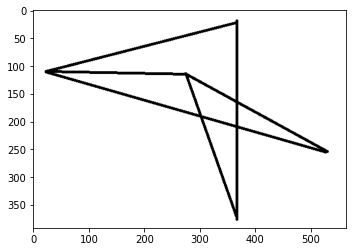

In [7]:

def solve(down, up):
    vertex_count = int(input())
    new_A = get_input() # считываем матрицу
    width = get_width(new_A) # находим ширину ребер
    results = np.arange((up - down) * width) # массив результатов экспериментов
    size = 0
    for i in range(down * width, up * width): # проводим эксперименты для квадратов различного размера
        results[size] = get_ans(new_A, width, i) 
        print(results[size])
        size += 1
    return statistics.mode(results) - vertex_count # считаем количество всевозможных пересечений, вычитая введенной количество вершин
    
solve(3, 5) # рассматриваем окна размеров от 3 * ширина_ребра до 5 * ширина_ребра (константы 3, 5 получены экспериментально), однако они вролне вариативны